**The Story of Loan Approval Dataset**

📚 **Once upon a dataset...**

In the bustling world of finance, there was a magical dataset known as the "Loan Approval Dataset." 🏦💰 This dataset lived in a digital vault and held the secrets of who would get a loan and who would not. Every day, data scientists, like curious wizards, explored its depths to uncover patterns and predictions. 🧙‍♂️📊

### **The Characters**

1. **Person\_Age** 👶👵: Representing the age of the applicant.
2. **Person\_Income** 🤑: How much money the applicant earned.
3. **Person\_Home\_Ownership** 🏡: Whether they owned, rented, or had other arrangements for housing.
4. **Person\_Emp\_Length** 🛠️: The length of the applicant's employment.
5. **Loan\_Intent** 🎯: The purpose for which the loan was requested (e.g., education, medical, or personal).
6. **Loan\_Grade** 🏅: The grade assigned to the loan based on risk.
7. **Loan\_Amnt** 💵: The amount the applicant wanted to borrow.
8. **Loan\_Int\_Rate** 📈: The interest rate applied to the loan.
9. **Loan\_Percent\_Income** ⚖️: The percentage of income that would go towards paying the loan.
10. **CB\_Person\_Default\_On\_File** 📜: Whether the person had a history of defaulting on loans.
11. **CB\_Person\_Cred\_Hist\_Length** 📊: The length of their credit history.
12. **Loan\_Status** ✅❌: The final decision—was the loan approved or rejected?

### **The Mystery**

Each row in the dataset was like a story of its own, with an applicant hoping to fulfill their dreams. For some, it was a house. 🏠 For others, it was starting a business. 🏢

But the decision wasn’t easy! The bank had to consider many factors. Could the applicant repay the loan? Did they have a good credit history? Did they earn enough? These questions were at the heart of the dataset. 🤔

### **The Quest**

One day, you decided to take on the quest of understanding this dataset. Armed with Python, pandas, and Matplotlib, you began your journey. 🐍📈

- **Step 1:** Cleaning the data! You filled missing values and ensured every column was in the right format. 🧹✨
- **Step 2:** Visualizing relationships! You created scatter plots, bar graphs, and heatmaps to see how income, employment, and credit history influenced loan approval. 📊🎨
- **Step 3:** Building a predictive model! Using logistic regression and random forests, you aimed to predict whether an applicant would get their loan approved. 🤖🌲

### **The Insights**

As you explored, you discovered that applicants with a strong credit history and steady income had a higher chance of approval. Graduates also seemed to have better odds. Education and financial responsibility played key roles. 🎓💪

### **The Impact**

With your model, banks could make faster and fairer decisions, ensuring deserving applicants could achieve their dreams. Whether it was buying a home or starting a business, your work helped make a difference. 🌟💼

### **The Moral of the Story**

Behind every dataset lies a story of real people, their dreams, and their struggles. By analyzing data responsibly, you can make an impact and bring positive change. 🌍❤️

**And thus, the tale of the Loan Approval Dataset became a legend in the world of data science.**



# **Let's start 🚀💡!**

In [35]:
# Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Loading datasets
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

# **Let's take a look into the dataset 📊🔍.**

In [37]:
df_train.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [38]:
print('----------Displaying Columns----------')
df_train.columns

----------Displaying Columns----------


Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [41]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [42]:
df_train.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [43]:
# Selecting columns with categorical data types (object columns like strings or categories)
categorical_columns = df_train.select_dtypes(include=['object']).columns
# Selecting columns with numerical data types (excluding object columns, so these are numbers like int or float)
numerical_columns = df_train.select_dtypes(exclude=['object']).columns

In [44]:
# Lets see uniqure values of categorical columns
for column in categorical_columns:
  num_unique = df_train[column].nunique()
  print(f'{column} has {num_unique} unique values')

person_home_ownership has 4 unique values
loan_intent has 6 unique values
loan_grade has 7 unique values
cb_person_default_on_file has 2 unique values


In [45]:
categorical_columns.tolist()

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [46]:
print('Numerical Columns')
numerical_columns.tolist()

Numerical Columns


['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']

In [47]:
test_ids = df_test['id']
target_column = 'loan_status'

df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

# **Power of Graphs 📊✨🔍**

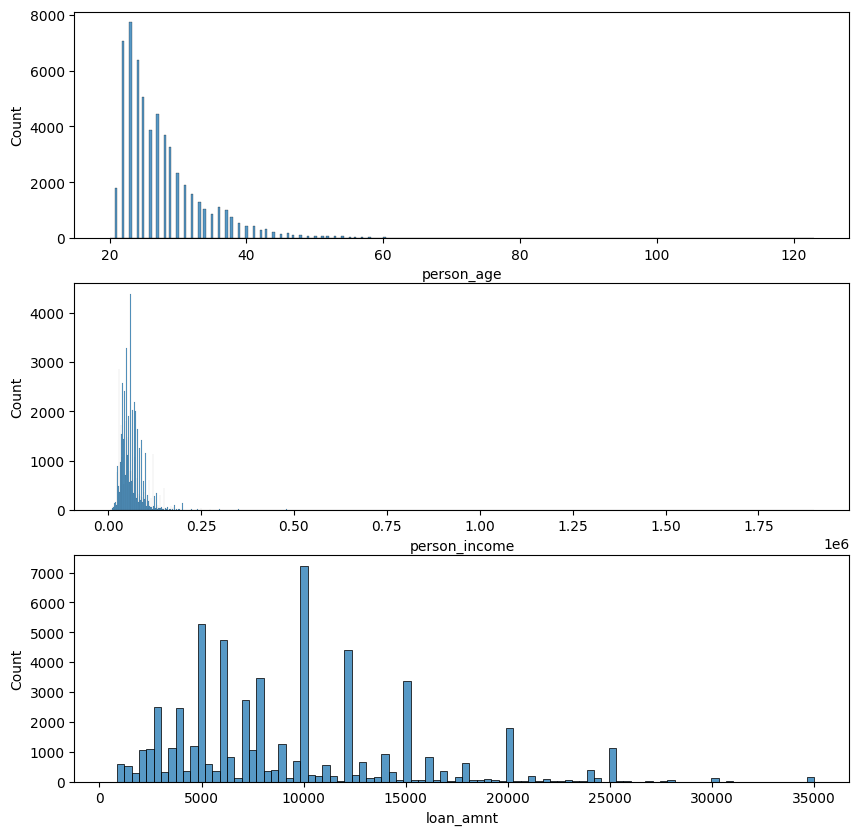

In [48]:
# Histogram plot
numerical_columns_to_plot = ['person_age', 'person_income', 'loan_amnt']
plt.figure(figsize=(10,10))
for i, column in enumerate(numerical_columns_to_plot):
  plt.subplot(3, 1, i+1)
  sns.histplot(data=df_train, x=column, kde=False)

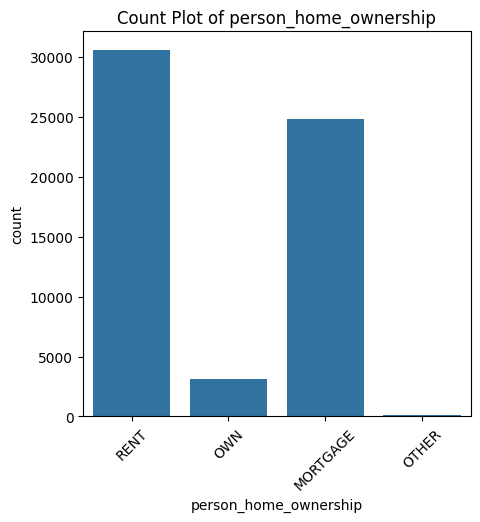

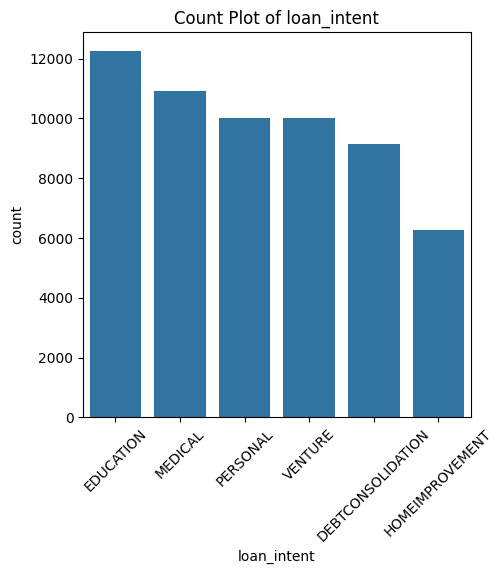

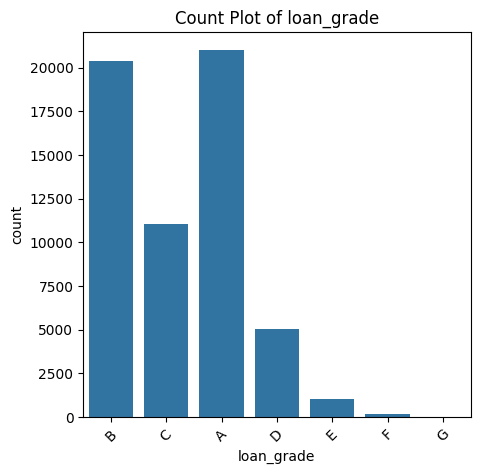

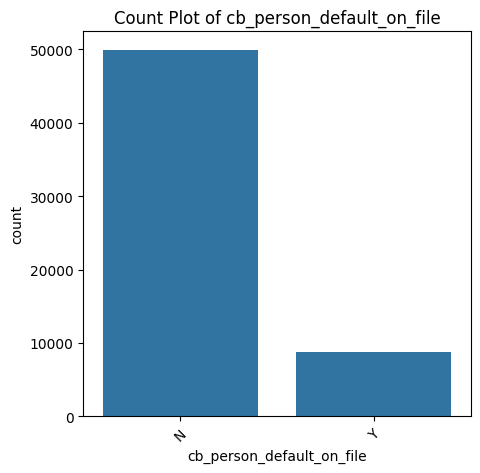

In [49]:
# Different Count Plots
categorical_columns_to_plot = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for i, column in enumerate(categorical_columns_to_plot):
  plt.figure(figsize=(5,5))
  sns.countplot(data=df_train, x=column)
  plt.title(f'Count Plot of {column}')
  xticklabels = plt.xticks(rotation=45)

<Figure size 500x500 with 0 Axes>

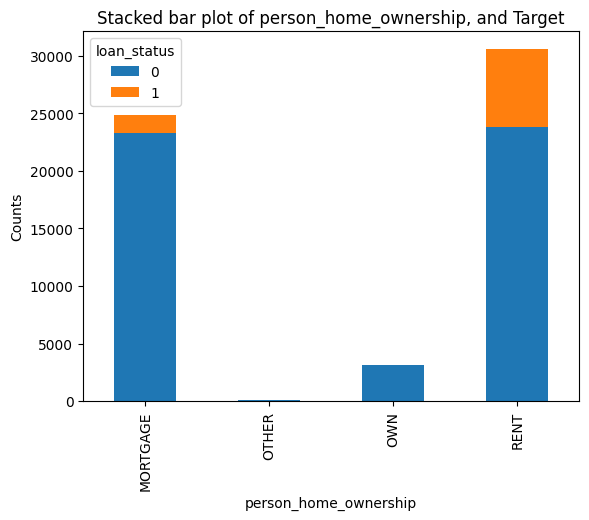

<Figure size 500x500 with 0 Axes>

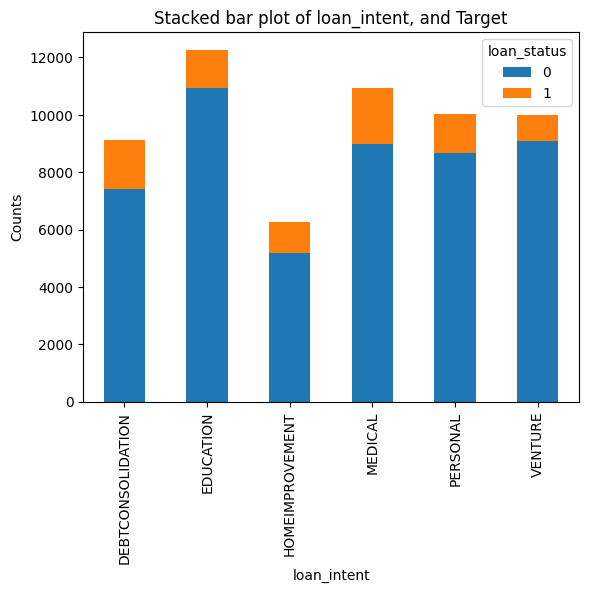

<Figure size 500x500 with 0 Axes>

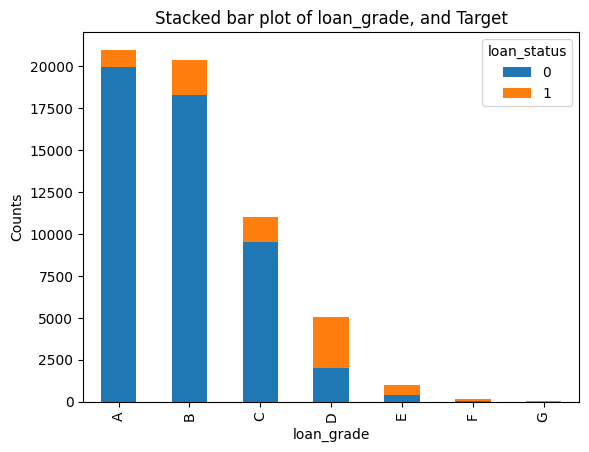

<Figure size 500x500 with 0 Axes>

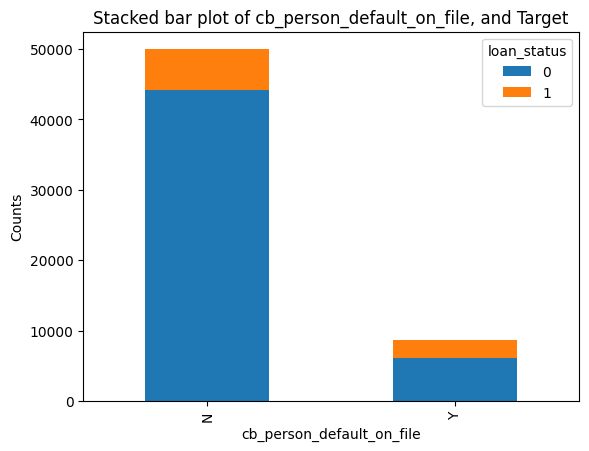

In [50]:
# Count Plots
for column in categorical_columns_to_plot:
  plt.figure(figsize=(5,5))
  pd.crosstab(df_train[column], df_train[target_column]).plot(kind='bar', stacked=True)
  plt.title(f'Stacked bar plot of {column}, and Target')
  plt.xlabel(column)
  plt.ylabel('Counts')
  plt.show()

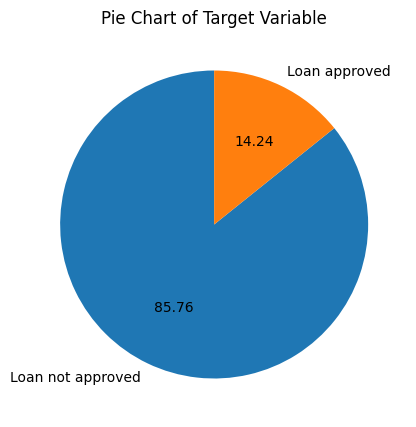

In [51]:
# Pie Plot
class_counts = df_train[target_column].value_counts().sort_index()
labels = ['Loan not approved', 'Loan approved']
plt.figure(figsize=(5,5))
plt.pie(class_counts, labels=labels, autopct='%.2f', startangle=90)
plt.title('Pie Chart of Target Variable')
plt.show()

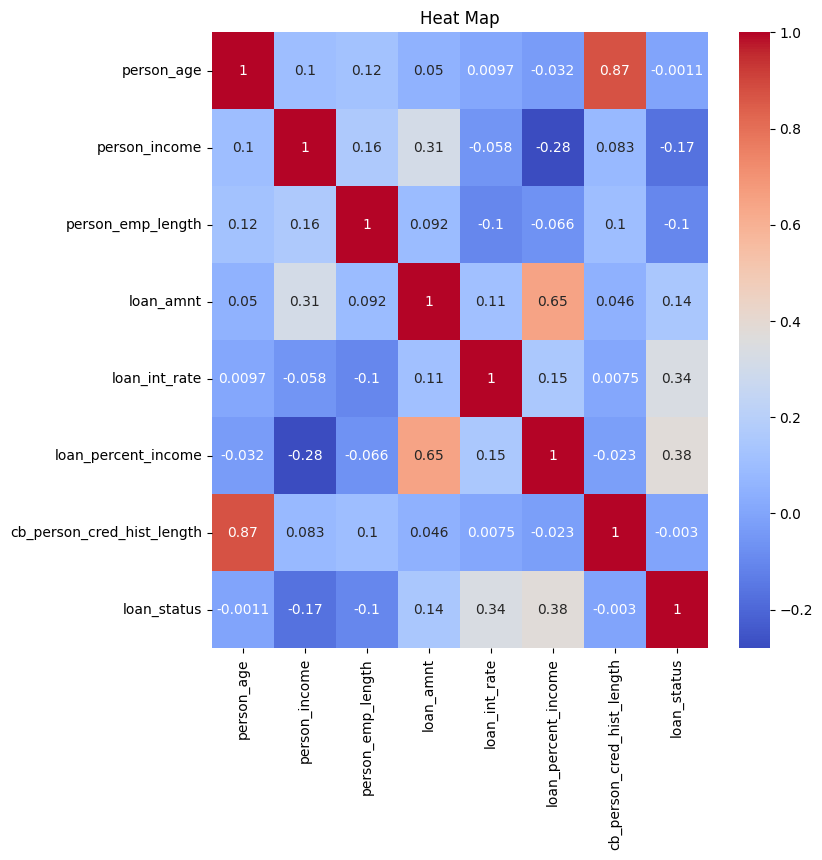

In [52]:
# Heat Map
corr = df_train.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

# **Feature Engineering 🛠️📐**

In [53]:
# Encoding categorical variables in the training and testing datasets using LabelEncoder to convert them into numerical values for model compatibility.
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:
  df_train[column] = label_encoder.fit_transform(df_train[column])
for column in categorical_columns:
  df_test[column] = label_encoder.fit_transform(df_test[column])

# **Let's make a model 🤖📈💡**

In [54]:
x = df_train.drop(target_column, axis=1)
y = df_train[target_column]

In [55]:
# Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [56]:
# Training Logistic Regression Model on Data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [57]:
# Training Random Forest model on Data
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
# Training gradient boosting model on data
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

# **Model Evaluation 📊🔍✅**

In [59]:
# Testing Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8857532611475829


In [60]:
# Testing Random Forest Model
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9509762128058658


In [61]:
# Test Gradient Boosting Model
y_pred = gb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy}')

Gradient Boosting Accuracy: 0.9481626737147242


In [62]:
sub = pd.read_csv('/content/sample_submission.csv')
sub[target_column] = rf_classifier.predict(df_test)
sub.to_csv('submission.csv', index=False)